# OM 516 Project 1

## Relevant package imports

In [11]:
import PublicFunctions as pf
import pandas as pd
import warnings
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
from tabulate import tabulate

## Import data, add unique identifier, x_bar, r

In [12]:
df = pd.read_csv('Data.csv')

df = df.assign(Sample_ID = df['Day'] + 0.1*df['Shift'])
df['Sample_ID'] = df.Sample_ID.astype('str')

try:
    df['xBar'] = df.iloc[:,3:12].mean(axis=1, numeric_only=True)  #Add x_bar column
    df['range'] = df.iloc[:,3:12].max(axis=1, numeric_only=True) - df.iloc[:,3:12].min(axis=1, numeric_only=True)
except:
    print("Invalid index selection")

df

,Team,Day,Shift,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Sample_ID,xBar,range
0,0,1,1,661.226099,663.836336,671.874621,662.281672,680.496261,644.955058,666.712699,648.901091,1.1,662.535480,35.541202
1,0,1,2,662.803141,659.943059,659.911707,638.021454,664.466429,671.007553,683.703054,673.506159,1.2,664.170319,45.681600
2,0,1,3,635.516188,648.661143,674.810351,650.674246,665.890920,645.414013,672.890260,677.600880,1.3,658.932250,42.084692
3,0,2,1,666.711323,666.683868,665.650363,655.540080,670.241834,662.910582,664.824587,669.309270,2.1,665.233988,14.701754
4,0,2,2,683.374869,685.590302,660.432865,670.059662,667.989203,680.830110,643.638658,653.279758,2.2,668.149428,41.951645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,155,6,2,641.724660,662.131416,653.611551,673.484870,662.382046,677.442291,665.818690,653.053824,6.2,661.206168,35.717632
3272,155,6,3,667.115932,658.249365,647.960892,650.065114,673.334040,675.946211,653.129823,676.059513,6.3,662.732611,28.098621
3273,155,7,1,649.439305,661.070588,669.850182,661.728555,660.374071,666.545913,661.172410,669.244902,7.1,662.428241,20.410877
3274,155,7,2,652.522083,655.253266,668.384847,663.130878,670.883500,638.938728,676.645502,670.288580,7.2,662.005923,37.706774


# Calculate Center Line and UCL,LCL

In [13]:
cl = df['xBar'].mean()
stdev = df['xBar'].std()
stderr = stdev/sqrt(len(df.axes[1]))

print(f"StdDev = {stdev}")
print(f"StdErr = {stderr}")

z = 3
ucl = cl + z*stderr
lcl = cl - z*stderr

rBar = df['range'].mean()
D3 = 0.14   #Taken from chart, PPTX CH06, p17
D4 = 1.86   #Taken from chart, PPTX CH06, p17
ucl_r = D4*rBar
lcl_r = D3*rBar

results = [(lcl, cl, ucl),(lcl_r, rBar, ucl_r)]

headers = ['LCL','CL','UCL']
index = ['X', 'R']
print(tabulate(results, headers, showindex=index, tablefmt='fancy_outline'))

StdDev = 4.6781232510612165
StdErr = 1.250281029898009
╒════╤═══════════╤══════════╤══════════╕
│    │       LCL │       CL │      UCL │
╞════╪═══════════╪══════════╪══════════╡
│ X  │ 656.086   │ 659.837  │ 663.588  │
│ R  │   3.99905 │  28.5646 │  53.1302 │
╘════╧═══════════╧══════════╧══════════╛


# Draw Charts

<function matplotlib.pyplot.show(close=None, block=None)>

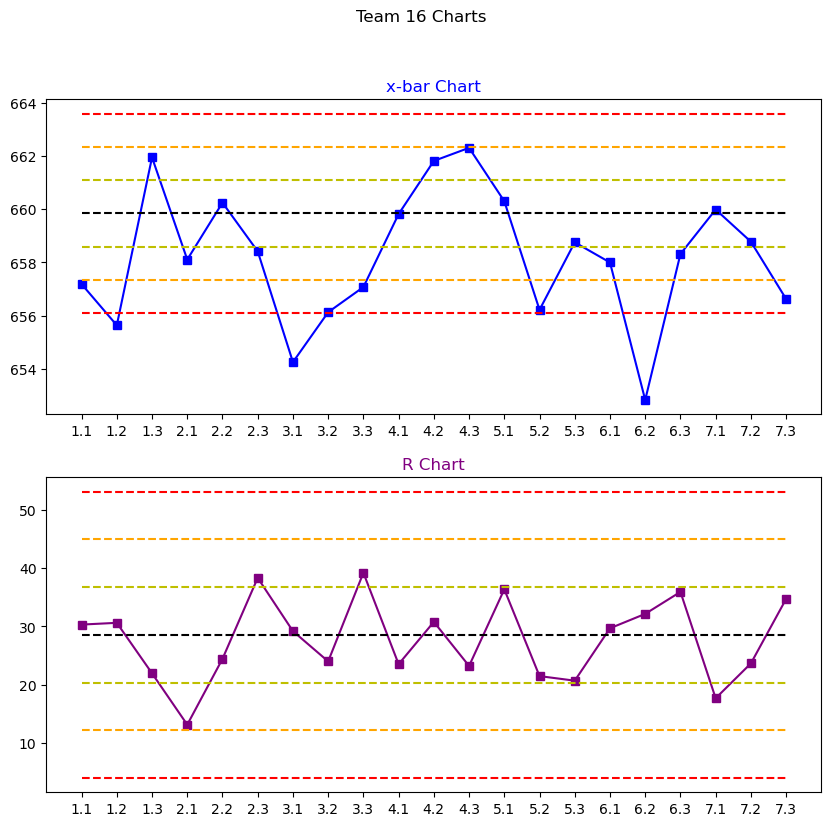

In [14]:
TEAM = 16
xLabels = df[df['Team']==TEAM]['Sample_ID']
xBarValues = df[df['Team']==TEAM]['xBar']
RValues = df[df['Team']==TEAM]['range']

fig = pf.DrawCombinedxBarAndRCharts(xLabels, xBarValues, RValues, cl, ucl, lcl, rBar, ucl_r, lcl_r)
fig.suptitle(f'Team {TEAM} Charts')
plt.show

# Out of Control Observations & Trends

# Control Chart Analysis

## Results

### Control Chart Plot

![Control Chart](control_chart.png)
  
### Out-of-Control Signals

- **Identification of Out-of-Control Signals**:
  - 1.2 -- Outside of Control Limits
  - 3.1 -- Outside of Control Limits
  - 6.2 -- Outside of Control Limits
  - 3.3 -- 2/3 Consecutive Points on the Same Side of the Centerline and 2+ Standard Deviations from the Mean

Process Capability

In [35]:
USL = 660 + 35  #Given
LSL = 660 - 35  #Given

mu = df.iloc[:,3:12].mean(numeric_only=True).mean(numeric_only=True)

Cp = (USL - LSL) / (6 * stdev)  #Good to have
Cpl = (mu - LSL) / (3 * stdev)  #Good to have
Cpu = (mu - LSL) / (3 * stdev)  #Good to have

Cpk = min((USL - mu)/3/stdev, (mu - LSL)/3/stdev)

print(f"Cpk: {Cpk}")


Cpk: 2.4822703800507115
